# RegTech Session: Transaction monitoring 

This session present an example focusing on transaction monitoring on an abstract level. We cover the following topis:

* Model of a transaction system
* Classical transaction schemes.
* Detection based on node-properties
* Detection based on transaction structures
* Limitations and Challenges


In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

from transaction_laboratory import transactionLaboratory
from schemes import random_behavior, layering, round_tripping

### Examples of transaction-based crime

Transaction-based crime is the core of compliance monitoring. In general, the aim of this crime is to pass funds or goods originating from illegal behavior. Examples of transaction-based crime include:

- Money laundering: 
- Sanction evasion:
- Credit card fraud:
- ...

### Research Question

Consider a set of users, some of which control multiple accounts, passing transactions around. Some transactions are compliant and some are non-compliant. How do we tell compliant from non-compliant ones?

### Abstraction of behavior

Transaction patterns differ from one case to another. However, certain different criminals can have the same ideas on how to pass illicitly obtained funds or goods. For example, layering is a relatively basic approach, as illustrated bellow 

## Random behavior, Layering, and Round Tripping

In [2]:
#set up agents

#non-compliant agents performing layering
N_lr_intermediate_accounts = 5
lr_accounts = {
    'source_account': 'SL',
    'intermediate_accounts': ['IL' + str(i) for i in range(N_lr_intermediate_accounts)],
    'target_account': 'TL'
}
lr = layering(lr_accounts)

#non-compliant agents performing round tripping
N_rt_source_accounts, N_rt_intermediate_accounts, N_rt_target_accounts = 10, 25, 4
rt_accounts = {
    'source_accounts': ['S' + str(i) for i in range(N_rt_source_accounts)],
    'intermediate_accounts': ['I' + str(i) for i in range(N_rt_intermediate_accounts)],
    'target_accounts': ['T' + str(i) for i in range(N_rt_target_accounts)]
}
rt = round_tripping(rt_accounts)

#all acounts
N_ra = 500
compliant_accounts = ['C' + str(i) for i in range(N_ra)]
allAccounts = compliant_accounts + lr.noncompliant_accounts + rt.noncompliant_accounts

#random compliant agents
rb = random_behavior(allAccounts)

In [3]:
df_rb = rb.generate(10000)
df_lr = lr.generate(9999)
df_rt = rt.generate(max_intermediate_transactions = 30)

df = pd.concat([df_rb, df_lr, df_rt])
df = df.sort_values('time')
print(df.shape)
df.head(10)

(12023, 4)


,source,target,amount,time
0,C141,C211,1190.00,2025-03-01 08:00:00
597,S1,I10,4380.35,2025-03-01 08:00:00
220,S5,I9,10225.58,2025-03-01 08:00:00
682,S0,I5,11023.12,2025-03-01 08:00:00
1091,S4,I18,9093.10,2025-03-01 08:00:00
1367,S4,I23,3957.40,2025-03-01 08:00:00
1741,S8,I24,15151.36,2025-03-01 08:00:00
1742,I24,I14,15151.36,2025-03-01 08:00:00
396,S4,I0,14634.19,2025-03-01 08:00:01
1743,I14,I13,15151.36,2025-03-01 08:00:01


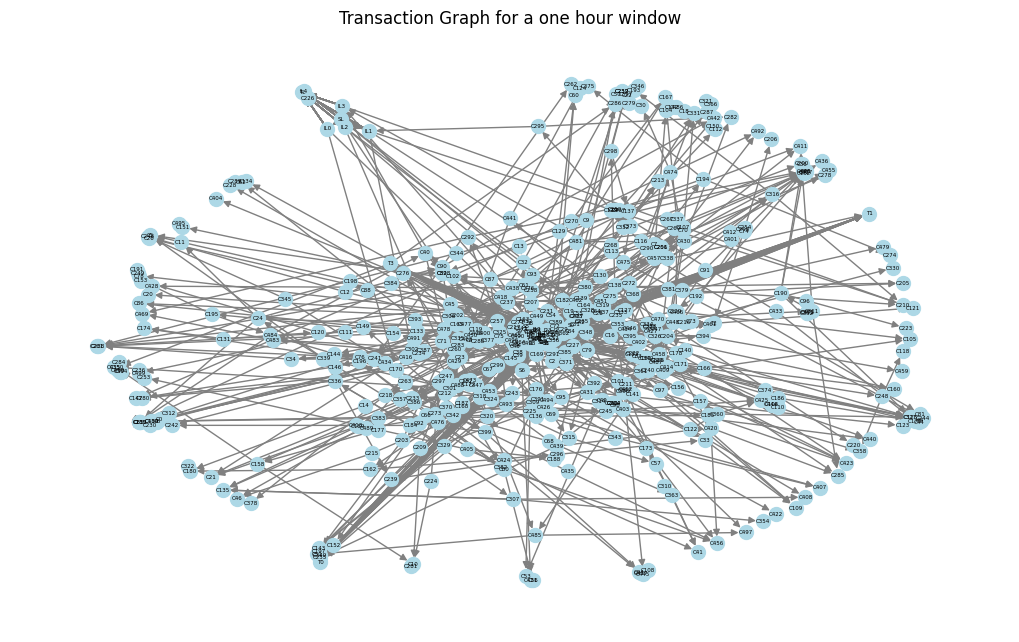

In [4]:
tmp = df.loc[df['time'] < datetime(2025, 3, 1, 9, 0, 0)]
rb.plotTransactionGraph(tmp, edgeLables=False, title="Transaction Graph for a one hour window") #TODO: maybe make this plot animated in time

## Detection

### Rule-based approach

<Axes: >

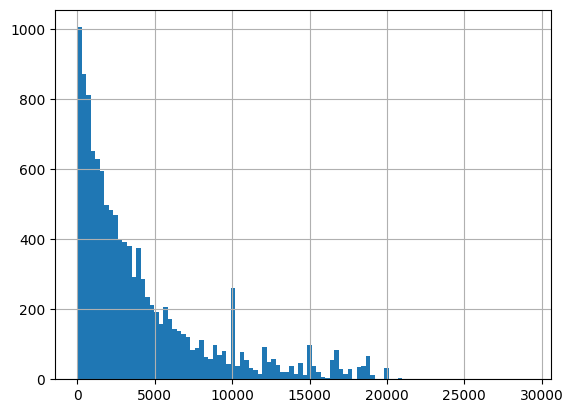

In [5]:
df['amount'].hist(bins = 100)

In [11]:
lower_th = 9000
upper_th = 10000
df_suspects = df.loc[(df['amount'] > lower_th) & (df['amount'] < upper_th)] 
set(df['source'] + df['target']).intersection(set(compliant_accounts))

set()